In [83]:
## Reconstructed phase change through corrections one by one

import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from pysar.simulation.plot import *
from pysar.utils import ptime, readfile, writefile, utils as ut, network as pnet, plot as pp
from pysar.objects import timeseries, ifgramStack, sensor


work_dir = '~/insarlab/Galapagos/GalapagosSenDT128/PYSAR'
work_dir = os.path.expanduser(work_dir)
os.chdir(work_dir)
print('Go to directory: '+work_dir)
proj_name = sensor.project_name2sensor_name(work_dir)[1]

m_date = '20150927'
s_date = '20160512'

out_file = '{}_phaseCorrection_{}.jpg'.format(proj_name, s_date)
wrap_range = [-5, 5]

mask, atr = readfile.read('maskTempCoh.h5')
ref_y, ref_x = int(atr['REF_Y']), int(atr['REF_X'])
dem = readfile.read('./INPUTS/geometryRadar.h5', datasetName='height')[0]
pha = []
for fname in ['timeseries.h5', 
              'timeseries_ECMWF.h5', 
              'timeseries_ECMWF_demErr.h5', 
              'timeseries_ECMWF_demErr_refDate_plane.h5']:
    data = readfile.read(fname, datasetName=s_date)[0]
    data -= readfile.read(fname, datasetName=m_date)[0]
    data *= 100.
    data[mask==0] = np.nan
    data = ut.wrap(data, wrap_range)
    pha.append(data)
print('Done.')

Go to directory: /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/PYSAR
reading height data from file: ./INPUTS/geometryRadar.h5 ...
reading timeseries data from file: timeseries.h5 ...
reading timeseries data from file: timeseries.h5 ...
reading timeseries data from file: timeseries_ECMWF.h5 ...
reading timeseries data from file: timeseries_ECMWF.h5 ...
reading timeseries data from file: timeseries_ECMWF_demErr.h5 ...
reading timeseries data from file: timeseries_ECMWF_demErr.h5 ...
reading timeseries data from file: timeseries_ECMWF_demErr_refDate_plane.h5 ...
reading timeseries data from file: timeseries_ECMWF_demErr_refDate_plane.h5 ...
Done.


save to file: GalapagosSenDT128_phaseCorrection_20160512.jpg


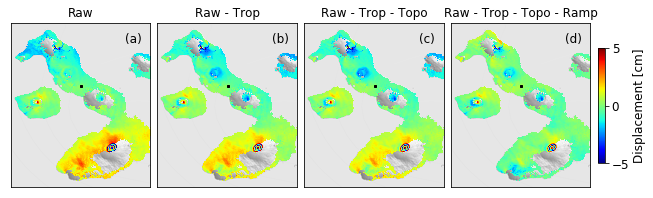

In [85]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=[10, 4], sharex=True, sharey=True)
inps = pp.cmd_line_parse()
inps.disp_dem_contour = False
disp_dem = True

title_list = ['Raw', 'Raw - Trop', 'Raw - Trop - Topo', 'Raw - Trop - Topo - Ramp']
num_list = ['(a)', '(b)', '(c)', '(d)']
for i in range(len(pha)):
    alpha = 1.0
    if disp_dem:
        ax[i] = pp.plot_dem_background(ax=ax[i], geo_box=None, dem=dem, inps=inps, print_msg=False)
    im = ax[i].imshow(pha[i], vmin=wrap_range[0], vmax=wrap_range[1], cmap='jet', alpha=alpha)
    ax[i].plot(ref_x, ref_y, 'ks', ms=2)
    ax[i].get_xaxis().set_ticks([])
    ax[i].get_yaxis().set_ticks([])
    #for pos in ['top', 'bottom', 'left', 'right']:
    #    ax[i].spines[pos].set_linewidth(0.5)
    pp.auto_flip_direction(atr, ax=ax[i], print_msg=False)
    ax[i].set_title(title_list[i], fontsize=font_size)
    ax[i].annotate(num_list[i], xy=(0.82, 0.88), color='k', xycoords='axes fraction', fontsize=font_size)

fig.subplots_adjust(wspace=0.05, right=0.93)
# colorbar
cax = fig.add_axes([0.94, 0.3, 0.01, 0.4])
cbar = plt.colorbar(im, cax=cax, ticks=[wrap_range[0], 0, wrap_range[1]])
cbar.ax.tick_params(which='both', direction='out', labelsize=font_size)
cbar.set_label('Displacement [cm]', fontsize=font_size)

plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save to file: '+out_file)
plt.show()

In [40]:
## Time-series through different phase corrections

work_dir = '~/insarlab/Galapagos/GalapagosAlosAT133/PYSAR'
lalo = ' --lalo -0.9275 -91.2709 --off 100 --ylim -50 450'

work_dir = '~/insarlab/Galapagos/GalapagosSenDT128/PYSAR'
lalo = ' --lalo -1.0352 -91.1917 --off 10 --ylim -10 50'

work_dir = os.path.expanduser(work_dir)
os.chdir(work_dir)
print('Go to directory: '+work_dir)
proj_name = sensor.project_name2sensor_name(work_dir)[1]


cmd = 'tsview.py {} {} {} {}'.format('timeseries_ECMWF_demErr_refDate_plane.h5', 
                                     'timeseries_ECMWF_demErr.h5', 
                                     'timeseries_ECMWF.h5', 
                                     'timeseries.h5')
cmd += ' --zf --wrap --wrap-range -5 5 --nodisplay {}'.format(lalo)
print(cmd)
os.system(cmd)

Go to directory: /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/PYSAR
tsview.py timeseries_ECMWF_demErr_refDate_plane.h5 timeseries_ECMWF_demErr.h5 timeseries_ECMWF.h5 timeseries.h5 --zf --wrap --wrap-range -5 5 --nodisplay  --lalo -1.0352 -91.1917 --off 10 --ylim -10 50


0